In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [5]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
df_raw.sample(10)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
203,6039,157672,24084,15.274748,23384,14.830788,22306,14.147090,20918,13.266782,...,8657,12.7,12.0,13.4,14552,3.5,3.3,3.7,4039,4
1462,28127,26758,3221,12.037521,3687,13.779057,3396,12.691531,3113,11.633904,...,2288,16.8,15.8,17.7,3427,4.0,3.8,4.3,824,3
1966,37157,90690,9633,10.621899,10658,11.752123,10196,11.242695,9422,10.389238,...,7639,14.9,13.9,15.9,10773,3.8,3.6,4.1,2781,3
1194,24009,92003,10677,11.605056,12805,13.918024,10650,11.575709,11332,12.316990,...,4842,11.3,10.5,12.1,7977,2.7,2.5,2.9,1898,2
2484,47117,33683,4195,12.454354,4464,13.252976,4050,12.023870,4209,12.495918,...,2765,13.5,12.6,14.5,3491,3.2,3.0,3.5,836,5
679,17173,21741,2475,11.384021,2592,11.922175,2279,10.482499,2369,10.896463,...,1673,11.9,10.9,12.9,2040,3.4,3.2,3.7,585,6
2898,51169,21534,1965,9.125104,2262,10.504319,2196,10.197827,2355,10.936194,...,2042,14.6,13.3,15.8,2578,3.9,3.6,4.3,691,3
232,6097,499942,51841,10.369403,58528,11.706958,60663,12.134008,64748,12.951102,...,25187,10.1,9.3,10.9,40587,3.0,2.8,3.2,12111,3
2420,46123,5478,719,13.125228,660,12.048193,609,11.117196,533,9.729828,...,328,12.7,11.6,13.7,535,3.8,3.5,4.1,159,6
3013,54047,18223,2090,11.469023,1961,10.761126,1848,10.141031,1886,10.349558,...,2877,21.3,20.1,22.7,3093,5.0,4.7,5.4,727,6


In [6]:
df_raw.to_csv("../data/raw/data_raw.csv")

In [29]:
df_processed = df_raw.copy()

In [8]:
df_processed.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

In [30]:
# Feature selection (picking useful independent variables)

df_interim = df_processed[["0-9","19-Oct","20-29","30-39","40-49","50-59","60-69","70-79","80+","% White-alone","% Black-alone","% NA/AI-alone","% Asian-alone","% Hawaiian/PI-alone","Less than a high school diploma 2014-18","High school diploma only 2014-18","Bachelor's degree or higher 2014-18","MEDHHINC_2018","Employed_2018","Unemployed_2018","Active Physicians per 100000 Population 2018 (AAMC)","Obesity_prevalence","Heart disease_prevalence","diabetes_prevalence"]]

In [31]:
df_interim.describe().T

,count,mean,std,min,25%,50%,75%,max
0-9,3140.0,12740.302866,41807.301846,0.000000,1280.500000,3057.000000,8097.000000,1.208253e+06
19-Oct,3140.0,13367.976752,42284.392134,0.000000,1374.500000,3274.000000,8822.250000,1.239139e+06
20-29,3140.0,14469.331529,49577.725396,0.000000,1263.750000,3108.000000,8976.250000,1.557073e+06
30-39,3140.0,13916.490127,48990.951710,11.000000,1232.750000,3000.500000,8314.250000,1.501844e+06
40-49,3140.0,12885.214331,43472.189993,4.000000,1245.250000,3048.500000,8120.500000,1.350076e+06
50-59,3140.0,13638.031529,42720.629434,14.000000,1483.000000,3515.500000,9157.250000,1.306003e+06
60-69,3140.0,11916.213057,34518.581878,20.000000,1476.500000,3410.000000,8710.500000,1.014325e+06
70-79,3140.0,7220.310510,20287.498429,6.000000,950.750000,2177.000000,5574.000000,5.725300e+05
80+,3140.0,4035.541720,12063.782251,0.000000,533.000000,1160.000000,2899.750000,3.562750e+05
% White-alone,3140.0,84.494109,16.348987,3.841985,79.620473,91.410189,95.521727,9.904378e+01


In [32]:
X = df_interim.drop(["Heart disease_prevalence"], axis=1)
y = df_interim["Heart disease_prevalence"]

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2115)

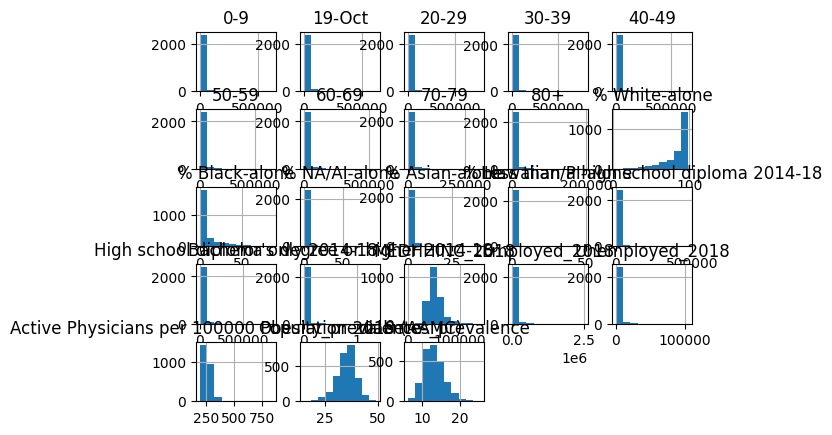

In [41]:
X_train.hist()
plt.show()

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=2119)

In [35]:
model = LassoCV(alphas=np.arange(0,1,0.05),cv=cv,n_jobs=-1)   

In [44]:
model.fit(X_train_scaled,y_train)

/workspaces/regularization_linear_regression/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/workspaces/regularization_linear_regression/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/workspaces/regularization_linear_regression/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415.28454981086634, tolerance: 0.6769285889380533
  model = cd_fast.enet_coordinate_descent_gram(
/

LassoCV(alphas=array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=2119),
        n_jobs=-1)

In [45]:
model.alpha_

0.0

In [48]:
y_hat = model.predict(X_test_scaled)

In [49]:
print(f"MSE: {mean_squared_error(y_hat,y_test)}")
print(f"R2: {r2_score(y_hat,y_test)}")

MSE: 0.48580054463901395
R2: 0.8422492939474416
